In [50]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re
from sklearn.metrics import average_precision_score, roc_auc_score
from collections import Counter
import seaborn as sns

In [4]:
dir_path = "../results/intermediate_results/MVTEC/DGAD/method16_transistor"

In [14]:
epochs=10
lr=0.00005

In [19]:
path = os.listdir(dir_path)
path.sort()
path = list(filter(lambda x: x.__contains__(f"epochs={epochs},lr={lr}"), path))

In [28]:
file_path = list(filter(lambda x: x.__contains__(f"epoch={4}"), path))

In [30]:
file_path

['method=16,backbone=DGAD15,domain_cnt=4,checkitew=transistor,batch_size=30,steps_per_epoch=20,epochs=10,lr=5e-05,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,cnt=0,epoch=4,brightness.npz',
 'method=16,backbone=DGAD15,domain_cnt=4,checkitew=transistor,batch_size=30,steps_per_epoch=20,epochs=10,lr=5e-05,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,cnt=0,epoch=4,contrast.npz',
 'method=16,backbone=DGAD15,domain_cnt=4,checkitew=transistor,batch_size=30,steps_per_epoch=20,epochs=10,lr=5e-05,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,cnt=0,epoch=4,defocus_blur.npz',
 'method=16,backbone=DGAD15,domain_cnt=4,checkitew=transistor,batch_size=30,steps_per_epoch=20,epochs=10,lr=5e-05,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,cnt=0,epoch=4,gaussian_noise.npz',
 'method=16,backbone=DGAD15,domain_cnt=4,checkitew=transistor,batch_size=30,steps_per_epoch=20,epochs=10,lr=5e-05,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,cnt=0,epoch=4,origin.npz',
 'method=16,backbone=DGAD15,domain_cnt=4,checkitew=tran

In [32]:
data = np.load(f'{dir_path}/{file_path[0]}', allow_pickle=True)

In [38]:
target_list = data["target_list"]
total_pred = data["total_pred"]
Counter(target_list)

Counter({0: 60, 1: 36})

array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95])

In [69]:
total_pred[idx1]

array([ 6.59144580e-01,  3.94072890e-01,  6.48589134e-02,  2.08612755e-01,
        5.44880629e-01,  2.53239870e-01,  1.03749171e-01,  1.59076914e-01,
        2.28562906e-01,  2.10045323e-01,  4.59152079e+00,  2.64653492e+00,
        6.49336398e-01,  8.85220230e-01,  2.36233965e-01,  1.02194557e+01,
        3.02898824e-01,  3.63855302e-01,  6.05188131e-01,  1.05031699e-01,
        1.09478414e-01,  8.64648372e-02,  4.66723025e-01, -3.56809120e-04,
        2.72891968e-01,  2.81261504e-01,  1.12962151e+00,  7.67185837e-02,
        6.24823213e-01,  2.00976372e-01,  1.59486383e-01,  5.60554564e-01,
        1.00421309e-01,  8.28765109e-02,  8.65003318e-02,  2.88188308e-01])

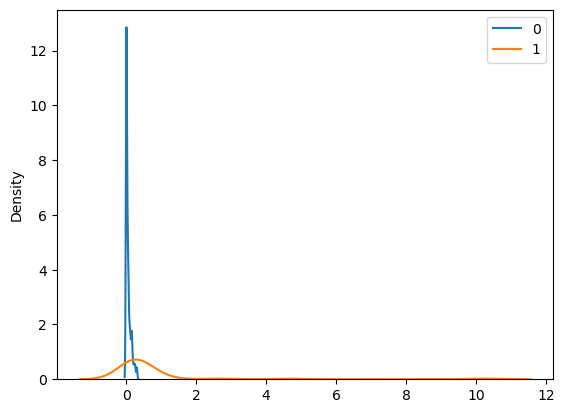

In [77]:
idx0 = np.where(target_list == 0)[0]
idx1 = np.where(target_list == 1)[0]
# plt.scatter(total_pred[idx0], np.zeros_like(idx0), label=0)
# plt.scatter(total_pred[idx1], np.ones_like(idx1), label=1)
# plt.legend()
sns.kdeplot(total_pred[idx0], label = 0, bw_adjust=0.5)
sns.kdeplot(total_pred[idx1], label = 1, bw_adjust=0.5)
plt.legend()